In [152]:
#importing the important libraries for use in the networks
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

In [153]:
#import the dataset
GK=nx.read_weighted_edgelist('Electronic2.txt')


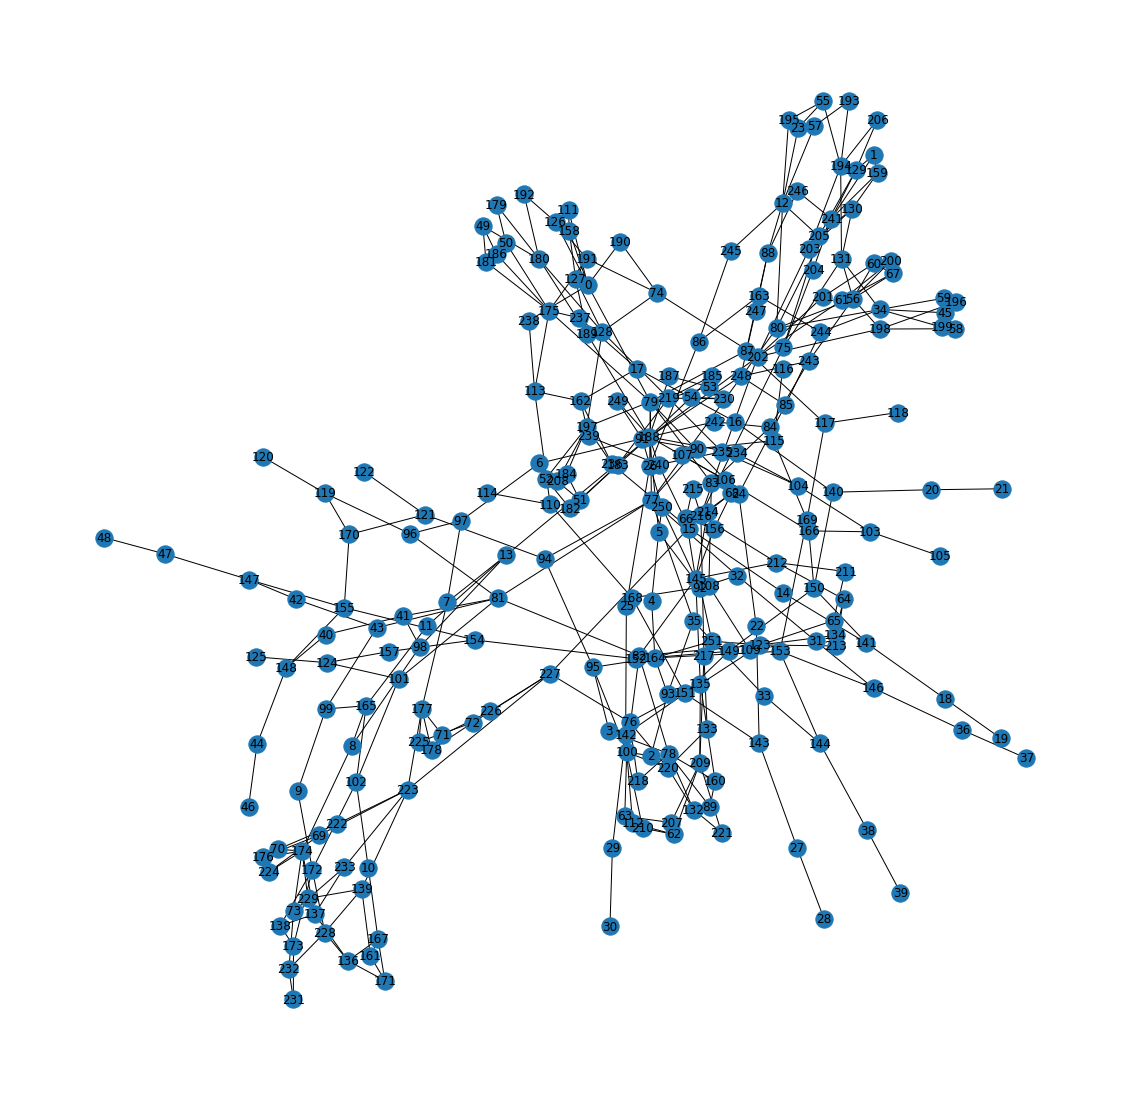

In [154]:
#Creating a network graph
plt.figure(3,figsize=(20,20))
nx.draw_networkx(GK)
plt.axis('off')
plt.show()

### Question Four 
## a)

In [155]:
A = nx.to_numpy_matrix(GK) #This line code creates the adjacency matrix
print(A) #This line of code prints out the adjacency matrix

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### *Since my network is a connected $k$-regular network, the number of triangles are $\frac{1}{6}tr(A^{3})$*

In [156]:
C_3=float((A**3).trace()/6) #This line of code calculates the number of triangles
C_3 #This line of code prints the number of triangles

20.0

#### *There are $|C_{3}|$= 20*

In [157]:
#This code below calculates the |P_2| of each node in the network
Degree =dict(GK.degree()) #This line of code converts degrees into dictionary
Degree_values=list(Degree.values()) #This line of code converts the values into a list
factorial_list = list() #This line of code creates an empty 
for i in Degree_values:
    factorial_list.append(scipy.special.comb(i,2))#This appends the empty list to take the sum k_i choose 2

P_2=sum(factorial_list) #This line of code sums up everything the factorial list   
print(P_2) #This line of code takes the sum of k_i choose 2 and prints it

1161.0


#### *There are $|P_{2}|$= 1161*

In [158]:
Newman_Coeffient=3*C_3/P_2 #This line of code computes the Newman clustering coefficient
Newman_Coeffient #This line of code prints the Newman clustering coefficient

0.05167958656330749

In [159]:
#This code below calculates the number of nodes in the network
nodes=GK.number_of_nodes() #This code uses a built in method for number of nodes
nodes #This code prints out the nodes

252

#### *The number of nodes is  $n$=252*

In [160]:
#This code below calculates the number of edges in the network
edges=GK.number_of_edges() #This code uses a built in method for number of edges
edges #This code prints out the edges

399

#### *The number of edges $m$=399* 

## *b) Lower and upper bounds on $\lambda_{1}
$*

## *For the lower bounds is $=\frac{2m}{n}$*

In [161]:
#This code below calculates the lower bound of the network
Lower_bound=2*nodes/edges #This line of code calculates the lower bound of the largest egienvalue
Lower_bound #This code prints out the lower bound

1.263157894736842

#### *Lower bound is $1.263157894736842$*

The upper bound is the $k_{max}$ which is the maximum degree of any node

In [162]:
#This code below calculates the upper bound of the network
Upper_bound=max(factorial_list) #This line of code calculates the upper bound of the largest egienvalue
Upper_bound #This code prints out the upper bound

91.0

#### *Upper bound is $91$*

Now we calculate the eigenvalues of the adjacency matrix

In [163]:
#Calculating the eigenvalues and getting only the largest eigenvalue
[eigenvalues,eigenvectors] = lg.eigh(A) #This code uses a built-in in scipy.linalg for eigenvalues and eigenvectors
K_max=max(eigenvalues) #This line of code take the highest eigenvalue
K_max #This line of code prints out the eigenvalue

4.359966475517406

#### $\lambda_1$=4.36

## *c) Plotting both PDF and CDF of the degree distribution*

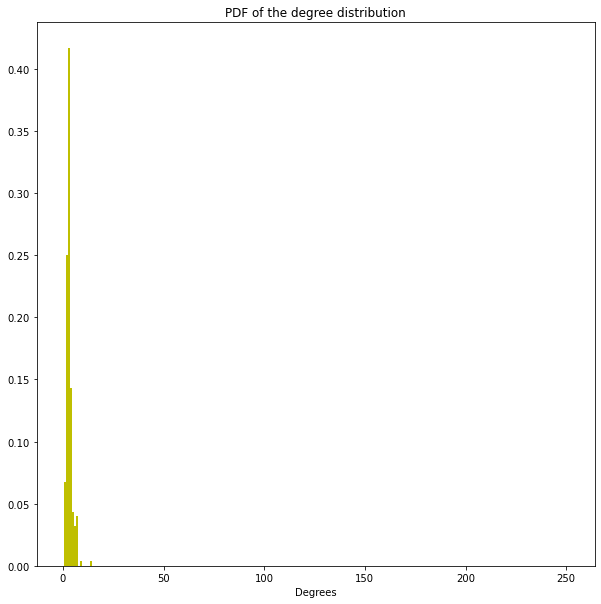

In [178]:
degrees = list(Degree.values()) #This takes the converted degrees dictionary values and cast them into a list
dist_deg = dict() #This line of code creates the dictionary of k_i:probability of k_i

for i in range(len(degrees)): #This line of code iterates throught the degree list and counts the most occuring degree
    if i in degrees:
        dist_deg[i] = degrees.count(i)/nodes
    else:
        dist_deg[i] = 0

#The code below plots the degrees vs. probabilities
plt.figure(figsize=(10,10)) #This line of code is for thr size of the figure
plt.title("PDF of the degree distribution") #This line is for the title
plt.xlabel("Degrees") #This line label the axes
plt.bar(dist_deg.keys(), dist_deg.values(), width= 1, color='y') #This line plots the graphs
plt.show()

### *The PDF degree distribution makes that 3 is the most frequent which is confirmed by my function below which checks for the most frequent value in the Degree dictionary.*

In [165]:
List =list(Degree.values()) #This line of code converts the values into a list
def most_frequent(List): 
    """ This function takes a list and return the most frequent number in the list."""
    return max(set(List), key = List.count)
print(most_frequent(List))

3


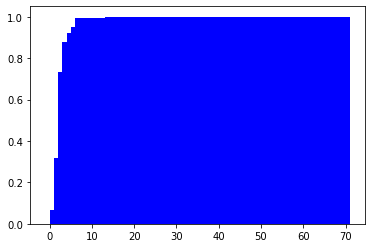

In [166]:
plt.bar(dist_deg.keys(), np.cumsum(list(dist_deg.values())), width= 2, color='b')
plt.show()

## *d) Plotting the network and highlight the 5 nodes of the highest degree in yuor plot.*

In [167]:
#This code below partitions the the network into 2 parts according to the signs of the eigenvector.
C1 = []
C2 = []
P = eigenvectors[:,0]

print("elements of community C1")
for i in range(nodes):
    if P[i] < 0:
        C1.append(i)
print (C1) 

print      
print("elements of community C2")
for i in range(nodes):
    if P[i] > 0:
        C2.append(i)
print (C2)

elements of community C1
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 23, 25, 27, 29, 31, 33, 36, 37, 39, 41, 42, 44, 48, 49, 51, 52, 54, 57, 58, 59, 61, 65, 66, 68, 70, 73, 75, 77, 78, 79, 82, 84, 85, 87, 89, 92, 93, 96, 99, 100, 102, 105, 106, 108, 109, 111, 112, 114, 117, 118, 120, 122, 124, 126, 127, 128, 129, 131, 137, 140, 141, 142, 143, 147, 150, 155, 156, 157, 158, 162, 163, 164, 165, 167, 169, 171, 172, 173, 176, 179, 180, 184, 186, 188, 193, 195, 197, 198, 199, 201, 203, 204, 205, 206, 209, 210, 211, 214, 216, 219, 223, 224, 225, 226, 228, 229, 230, 231, 235, 239, 243, 245, 246, 247, 250]
elements of community C2
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32, 34, 35, 38, 40, 43, 45, 46, 47, 50, 53, 55, 56, 60, 62, 63, 64, 67, 69, 71, 72, 74, 76, 80, 81, 83, 86, 88, 90, 91, 94, 95, 97, 98, 101, 103, 104, 107, 110, 113, 115, 116, 119, 121, 123, 125, 130, 132, 133, 134, 135, 136, 138, 139, 144, 145, 146, 148, 149, 151, 152, 153, 154, 159, 160, 161, 166, 168, 170, 174

In [168]:
degrees = list(Degree.values())
dist_deg = dict()
for i in degrees:
    dist_deg[i] = degrees.count(i)/nodes

In [169]:
degrees = list(Degree.values())
degrees.sort()
degrees[-5:]

[7, 7, 7, 9, 14]

In [170]:
#This code below take the 5 nodes of the highest degree in my plot
C1 = [j for j in list(Degree.keys()) if Degree[j]>=7][-5:]
C1

['175', '188', '202', '216', '219']

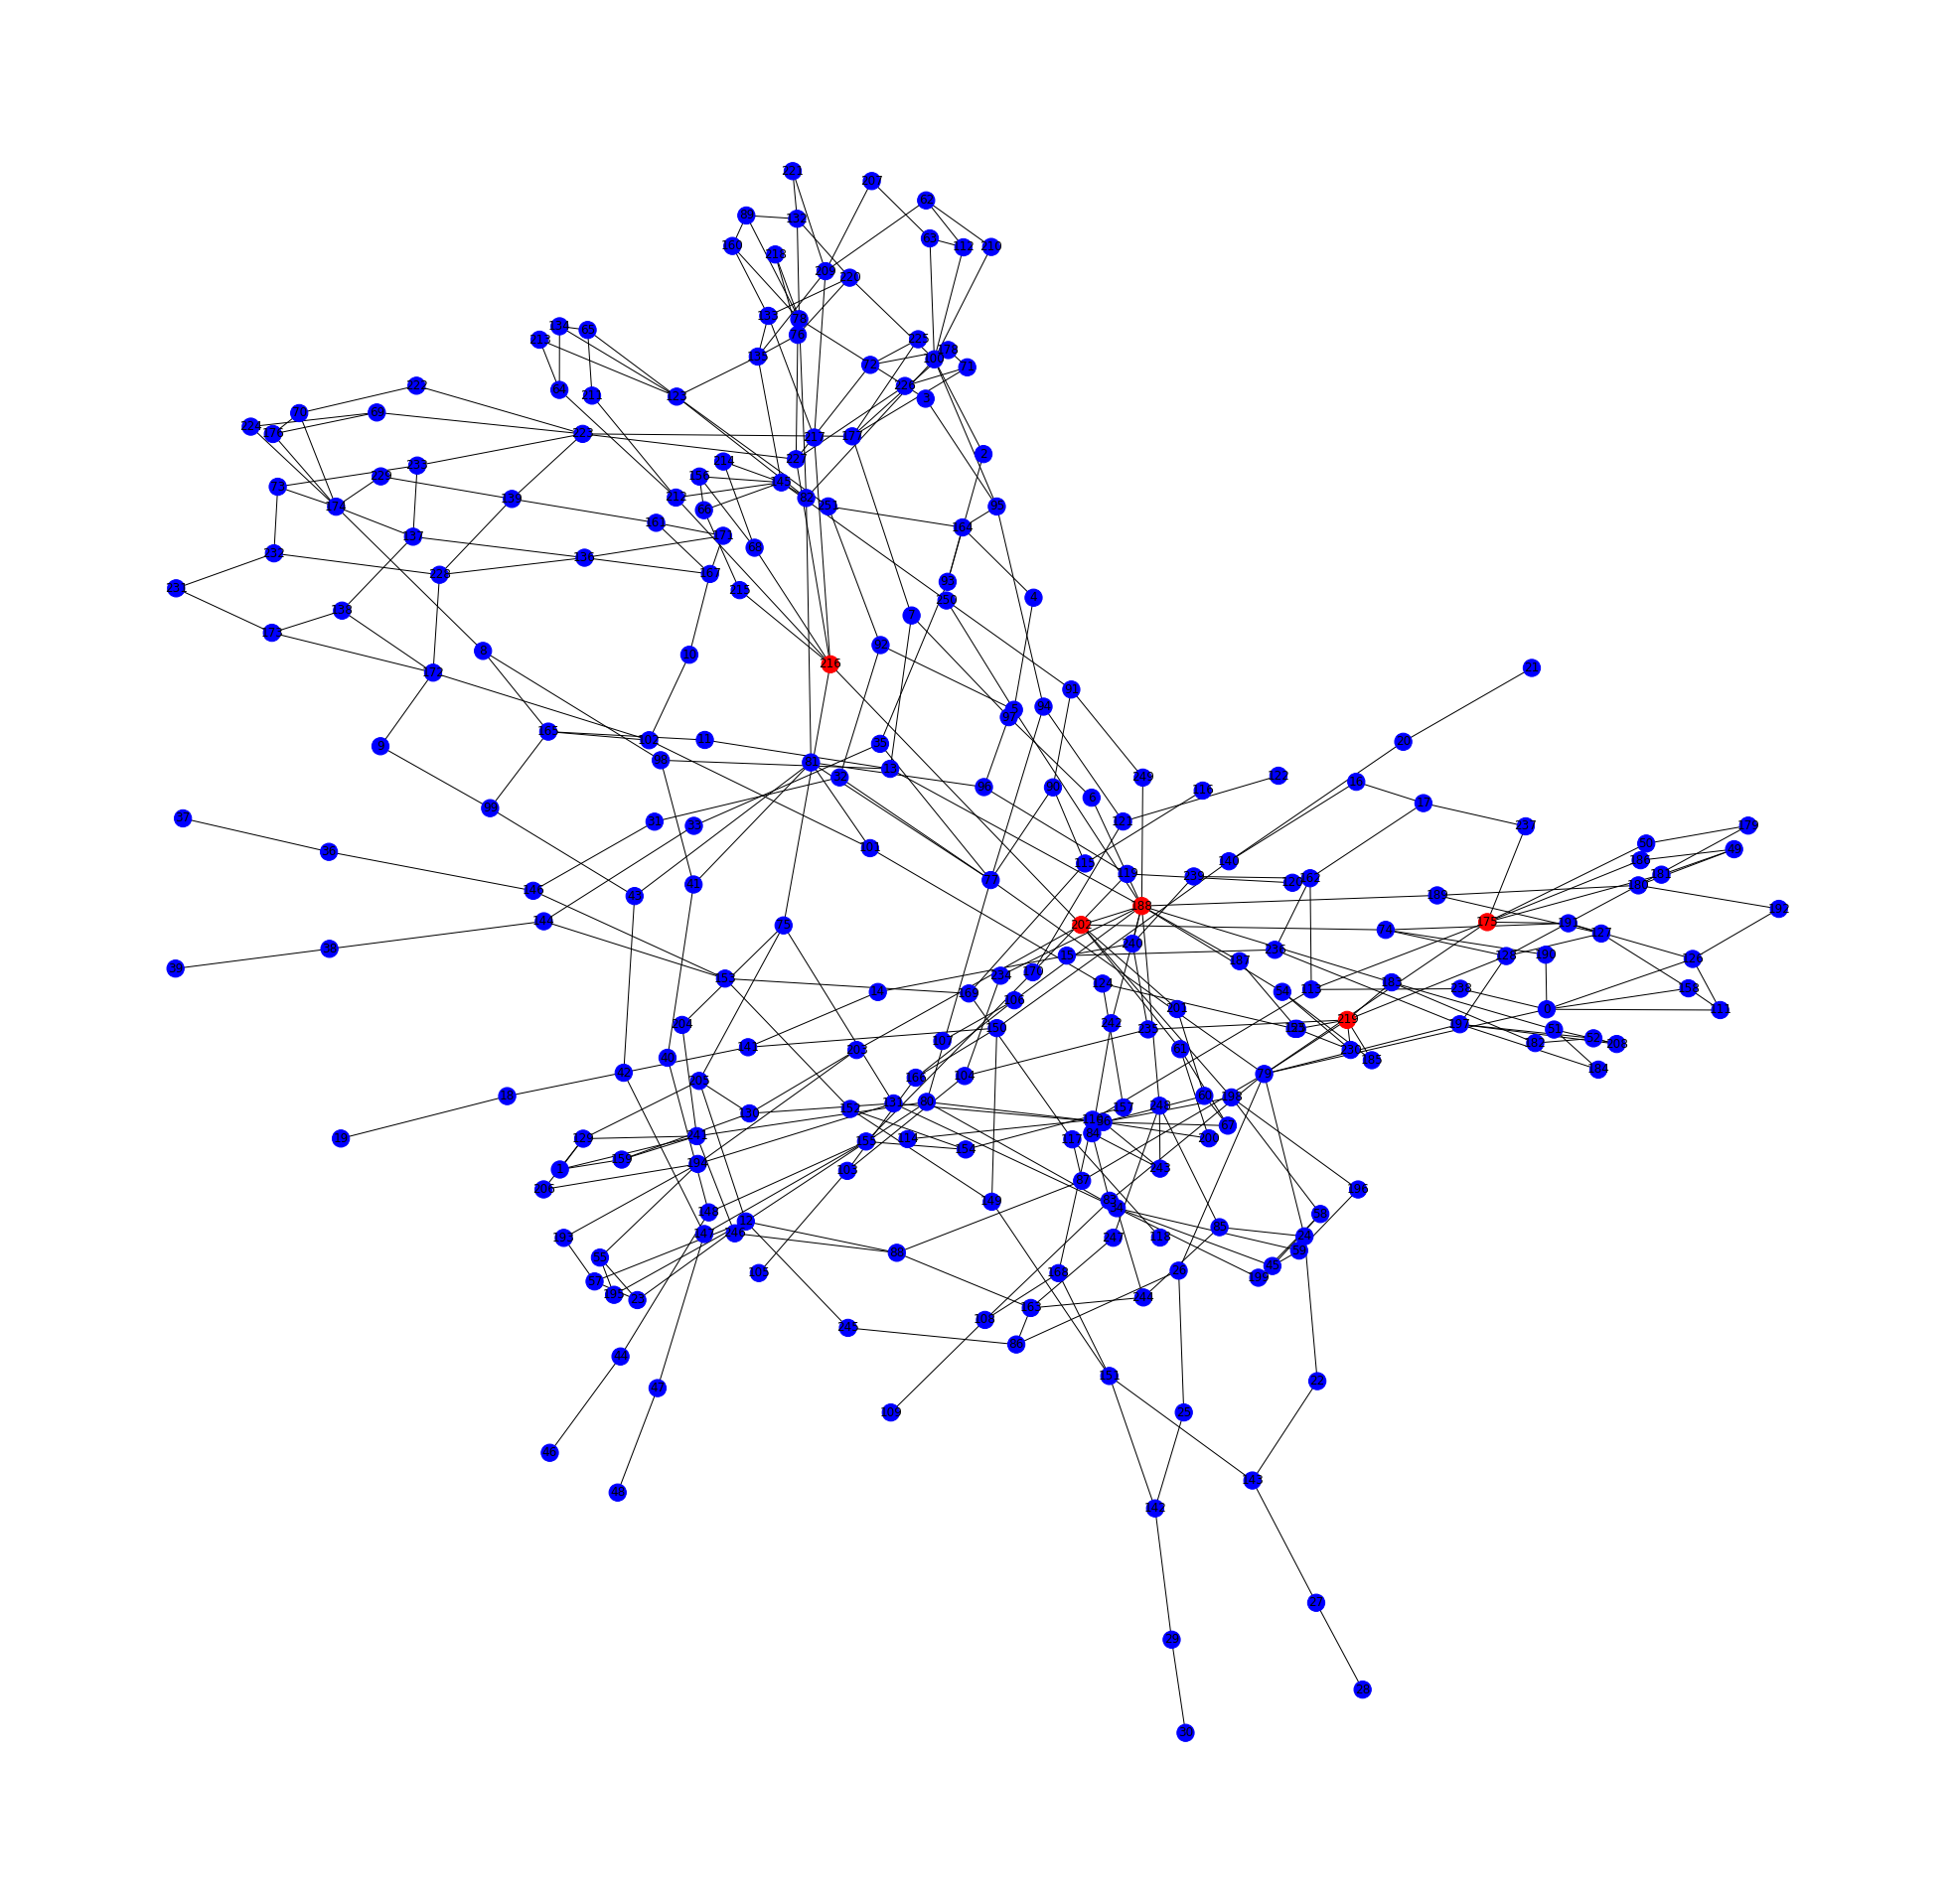

In [179]:
#highlights of the partitioning into 2 communities
#C1=[-5:]
color = []
for i in list(Degree.keys()):
    if i in C1:
        color.append('r')
    else:
        color.append('b')

plt.figure(figsize=(35,35)) #This line of code is for thr size of the figure
nx.draw_networkx(GK,node_color = color)
plt.axis('off')
plt.savefig('assignment 2.png')
plt.show()